In [1]:
# Harbinger Package
# version 1.0.50

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/jupyter_harbinger.R")

#loading Harbinger
load_harbinger() 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘daltoolbox’”

Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger

Warning message:
“replacing previous import ‘TSPred::minmax’ by ‘daltoolbox::minmax’ when loading ‘harbinger’”


In [2]:
#loading the example database
data(har_examples)

In [3]:
#Using the time series 1 
dataset <- har_examples[[17]]
dataset$event <- factor(dataset$event, labels=c("FALSE", "TRUE"))
head(dataset)

,serie,event
,<dbl>,<fct>
1,1.0000000,FALSE
2,0.9689124,FALSE
3,0.8775826,FALSE
4,0.7316889,FALSE
5,0.5403023,FALSE
6,0.3153224,FALSE


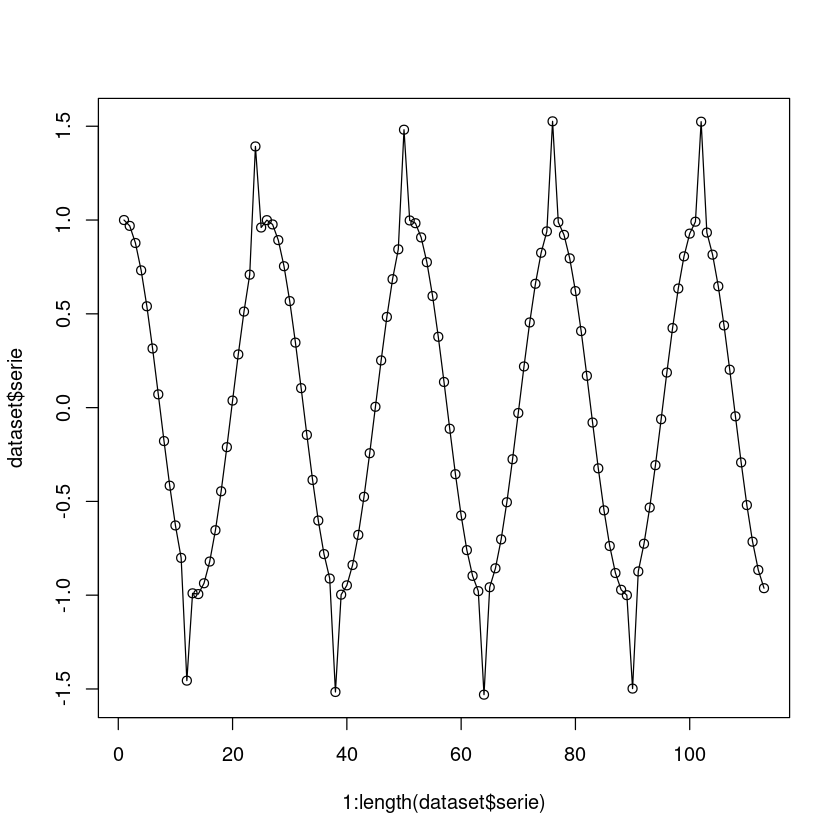

In [4]:
#ploting serie #1

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# data preprocessing
slevels <- levels(dataset$event)

train <- dataset[1:80,]
test <- dataset[-(1:80),]

norm <- minmax()
describe(norm)
norm <- fit(norm, train)
train_n <- transform(norm, train)
summary(train_n)

[1] "minmax"

     serie          event   
 Min.   :0.0000   FALSE:74  
 1st Qu.:0.2848   TRUE : 6  
 Median :0.5292             
 Mean   :0.5167             
 3rd Qu.:0.7491             
 Max.   :1.0000             

In [6]:
# establishing decision tree method 
model <- har_cla(cla_dtree("event", slevels))

In [7]:
# fitting the model
model <- fit(model, train_n)
detection <- detect(model, train_n)
print(detection |> dplyr::filter(event==TRUE))
# evaluating the training
evaluation <- evaluate(model, detection$event, as.logical(train_n$event))
print(evaluation$confMatrix)

cla_dtree,0.000



  idx event    type
1   1  TRUE anomaly
2  12  TRUE anomaly
3  14  TRUE anomaly
4  24  TRUE anomaly
5  26  TRUE anomaly
6  38  TRUE anomaly
7  50  TRUE anomaly
8  64  TRUE anomaly
9  76  TRUE anomaly
          event      
detection TRUE  FALSE
TRUE      6     3    
FALSE     0     71   


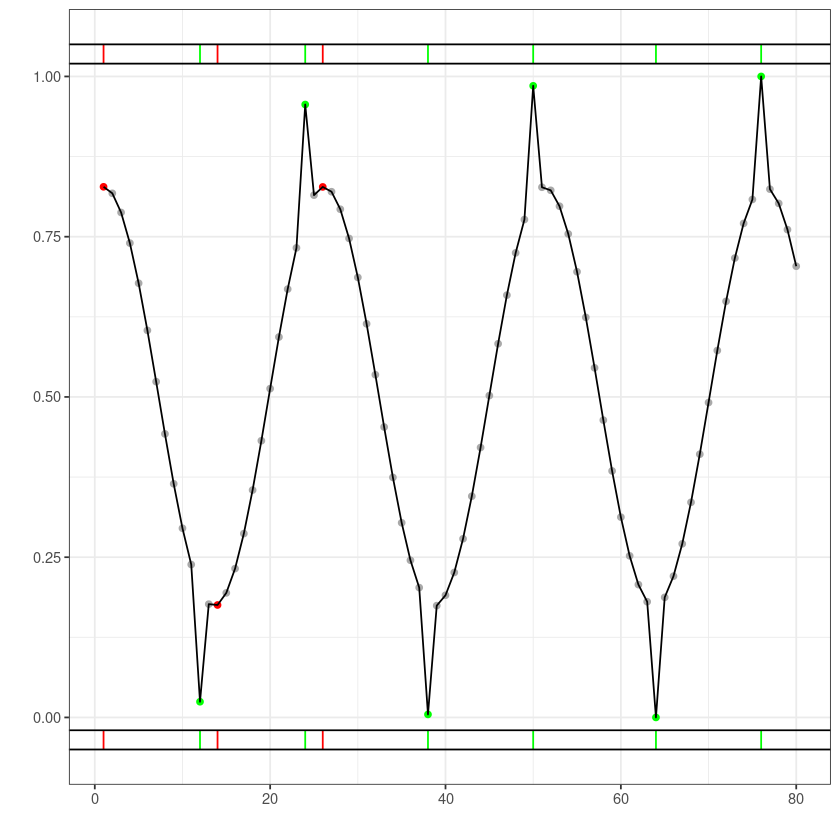

In [8]:
# ploting training results
  grf <- plot.harbinger(model, train_n$serie, detection, as.logical(train_n$event))
  plot(grf)

In [9]:
# preparing for testing
  test_n <- transform(norm, test)

In [10]:
# evaluating the detections during testing
  detection <- detect(model, test_n)

  print(detection |> dplyr::filter(event==TRUE))

  evaluation <- evaluate(model, detection$event, as.logical(test_n$event))
  print(evaluation$confMatrix)

  idx event    type
1   9  TRUE anomaly
2  22  TRUE anomaly
          event      
detection TRUE  FALSE
TRUE      1     1    
FALSE     1     30   


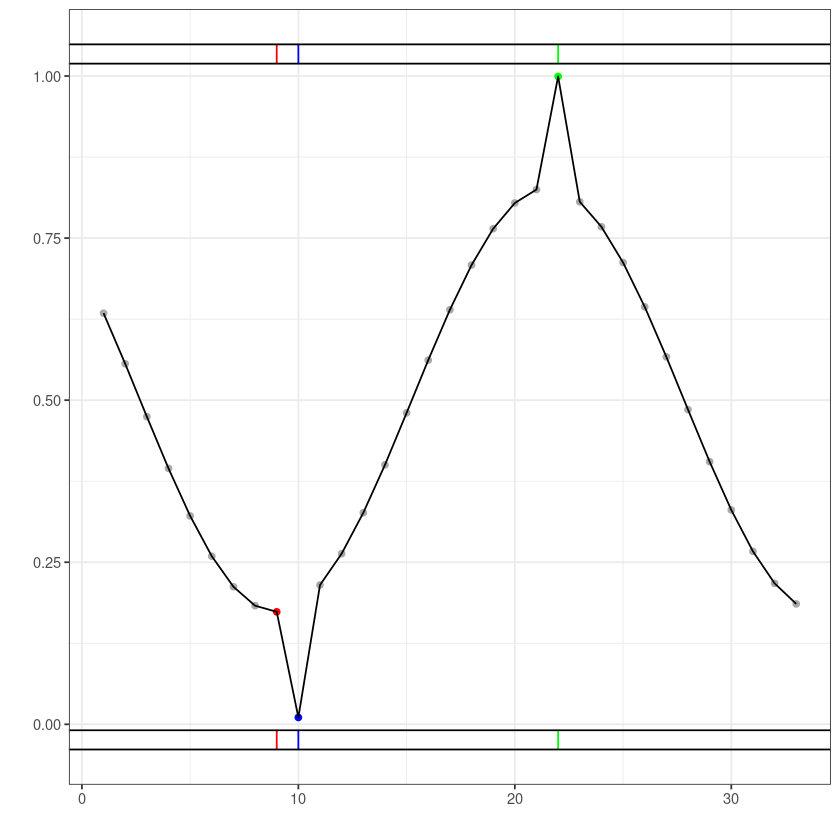

In [11]:
# ploting the results during testing
  grf <- plot.harbinger(model, test_n$serie, detection, as.logical(test_n$event))
  plot(grf)